In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [16]:
independent=dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [17]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [18]:
#sklearn library used to split train and test model
from sklearn.model_selection import train_test_split
#Then call train_test_split function it is parameterised function
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [19]:
 from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="mae",splitter="random",max_features="sqrt")
regressor=regressor.fit(X_train,Y_train)

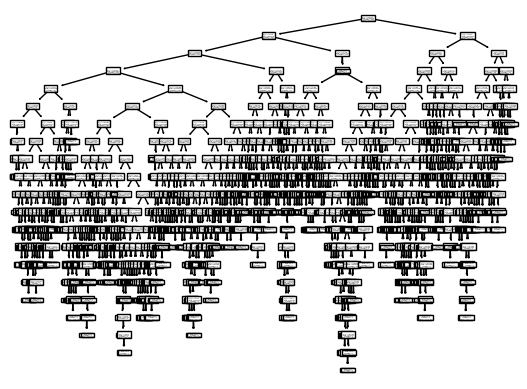

In [20]:
#this library for graph purpose
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={"criterion":['mse','mae','friedman_mse'],'max_features':['auto','sqrt','log2'],'splitter':['best','random']}
grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)
#fitting the model for grid search
grid.fit(X_train,Y_train)
#regressor=SVR(kernel="precomputed",C=10)
#regressor.fit(X_train,Y_train)

C:\Users\prave\Anaconda3\envs\aiml\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    5.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             p

In [22]:
#print best parameter after tuning
#print(grid.best_params_)
re=grid.cv_results_
#print (re)
grid_predictions=grid.predict(X_test)
#print classification report
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,grid_predictions)
print("The R_score value for best parameter{}:".format(grid.best_params_),r_score)

The R_score value for best parameter{'criterion': 'mse', 'max_features': 'sqrt', 'splitter': 'best'}: 0.7116231322924416


In [23]:
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008366,0.002347,0.009376,0.002698,mse,auto,best,"{'criterion': 'mse', 'max_features': 'auto', '...",0.567367,0.689995,0.620642,0.626001,0.050206,9
1,0.004049,0.004065,0.014616,0.004479,mse,auto,random,"{'criterion': 'mse', 'max_features': 'auto', '...",0.583137,0.668304,0.636246,0.629229,0.035122,7
2,0.014276,0.001572,0.002872,0.002059,mse,sqrt,best,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.609284,0.719056,0.649352,0.659231,0.045355,1
3,0.011343,0.002182,0.006490,0.004639,mse,sqrt,random,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.485840,0.638908,0.587598,0.570782,0.063611,14
4,0.014775,0.010905,0.006521,0.004771,mse,log2,best,"{'criterion': 'mse', 'max_features': 'log2', '...",0.564086,0.632930,0.664541,0.620519,0.041939,10
5,0.009203,0.000472,0.003474,0.002603,mse,log2,random,"{'criterion': 'mse', 'max_features': 'log2', '...",0.664595,0.602787,0.630794,0.632726,0.025270,6
6,0.035143,0.007961,0.006232,0.008813,mae,auto,best,"{'criterion': 'mae', 'max_features': 'auto', '...",0.620716,0.634400,0.674174,0.643097,0.022674,3
7,0.028890,0.008733,0.001893,0.002677,mae,auto,random,"{'criterion': 'mae', 'max_features': 'auto', '...",0.559470,0.666847,0.656496,0.627604,0.048363,8
8,0.027926,0.010072,0.005983,0.003642,mae,sqrt,best,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.603620,0.677303,0.680241,0.653721,0.035447,2
9,0.017761,0.002501,0.006792,0.002666,mae,sqrt,random,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.556391,0.641105,0.603746,0.600414,0.034664,12


In [24]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
children_input=float(input("Children:"))
sex_male_input=int(input("Sex Male 0 or 1:"))
smoker_yes_input=int(input("Smoker Yes 0 or 1:"))

Age:45
BMI:65
Children:2
Sex Male 0 or 1:1
Smoker Yes 0 or 1:1


In [25]:
Future_Prediction=grid.predict([[age_input,bmi_input,children_input,sex_male_input,
smoker_yes_input]])
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[42760.5022]
